In [21]:
#Import Python Libraries

%matplotlib inline
import matplotlib.pyplot as plt
import xml.etree.ElementTree as etree 
from datetime import datetime, timedelta
import os
import json
import pandas as pd
import numpy as np
from pytz import common_timezones, all_timezones, timezone
import math

In [22]:
#activity_file = "D:/downloads/activity_873783146.tcx" # Naul cycle with Barry
#activity_file = "D:/downloads/activity_898238015.tcx" # Great Dublin Cycle

# Define name and path of data file

input_file = 'activity_898238015.json' # Great Dublin Cycle
input_dir = os.path.join("/", "opt","jupyter","data","csv" )
input_file_path = os.path.join(input_dir , input_file)

output_file = 'activity_898238015_10.csv'
output_dir = os.path.join("/", "opt","jupyter","data","csv" )
output_file_path = os.path.join(input_dir , output_file)

print ("Input file is (full path)  ", input_file_path)
print ("Output file is (full path)  ", output_file_path)

Input file is (full path)   /opt/jupyter/data/csv/activity_898238015.json
Output file is (full path)   /opt/jupyter/data/csv/activity_898238015_10.csv


In [23]:
with open(input_file_path, 'r') as json_data:
    d = json.load(json_data)

df = pd.DataFrame.from_dict(d['data_points'])
number_data_points = len(df)
print("Number of data points is {:,}".format(number_data_points))
df.head()

Number of data points is 5,358


,altitude,cadence,distance,heart_rate,latitude,longitude,time
0,79.400002,76,5.010000,103,53.363708,-6.190183,2015-09-13T06:25:51
1,90.800003,83,28.090000,106,53.363761,-6.190519,2015-09-13T06:25:56
2,90.800003,84,34.740002,106,53.363779,-6.190614,2015-09-13T06:25:57
3,90.800003,85,40.650002,108,53.363817,-6.190668,2015-09-13T06:26:00
4,90.800003,87,52.090000,110,53.363877,-6.190771,2015-09-13T06:26:03


In [24]:
df.describe()

,altitude,cadence,distance,heart_rate,latitude,longitude
count,5358.000000,5312.000000,5347.000000,5358.000000,5347.000000,5347.000000
mean,111.955730,65.521273,55305.131840,128.561590,53.491536,-6.301922
std,36.721701,34.935758,28127.615377,13.721647,0.093893,0.083439
min,54.799999,0.000000,5.010000,85.000000,53.345526,-6.449606
25%,78.000000,57.000000,35449.244141,118.000000,53.397380,-6.381119
50%,119.400002,78.000000,56192.808594,129.000000,53.495561,-6.293268
75%,137.800003,89.000000,74205.464844,139.000000,53.577163,-6.258500
max,200.600006,128.000000,105730.960938,162.000000,53.625859,-6.122161


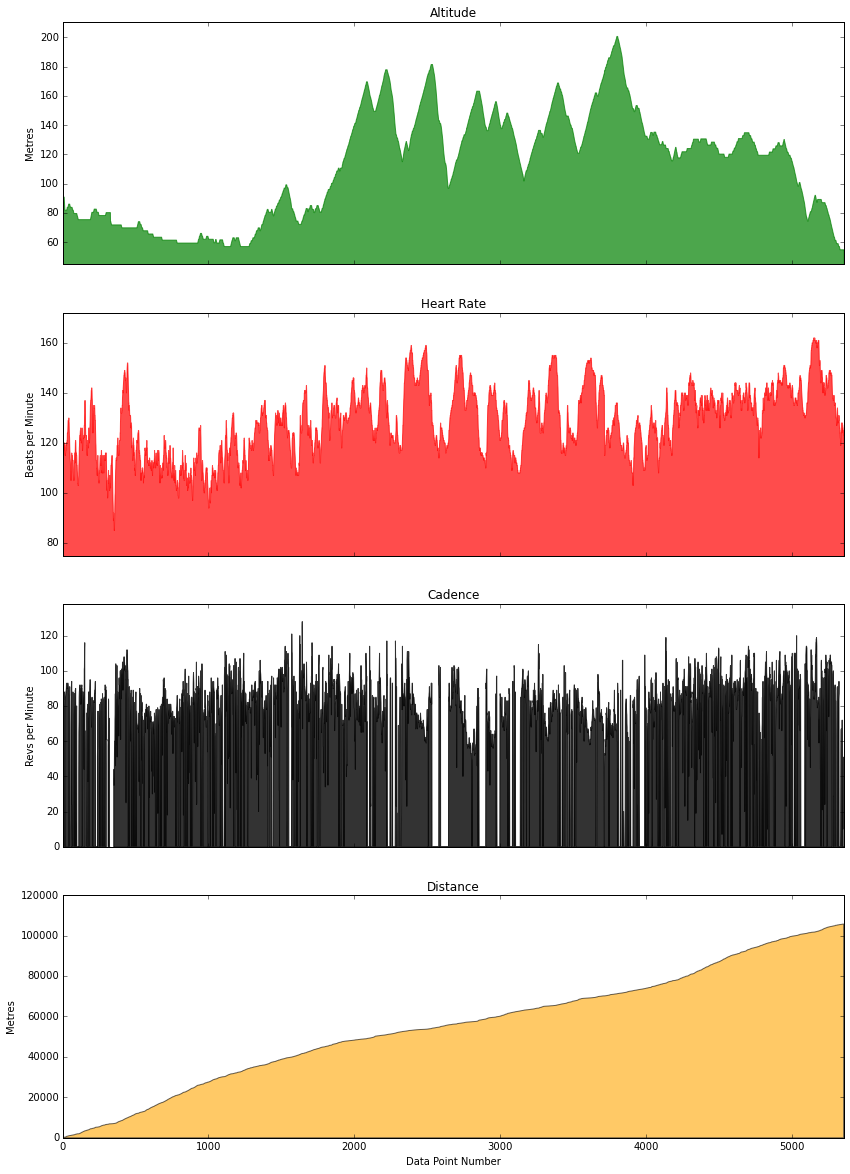

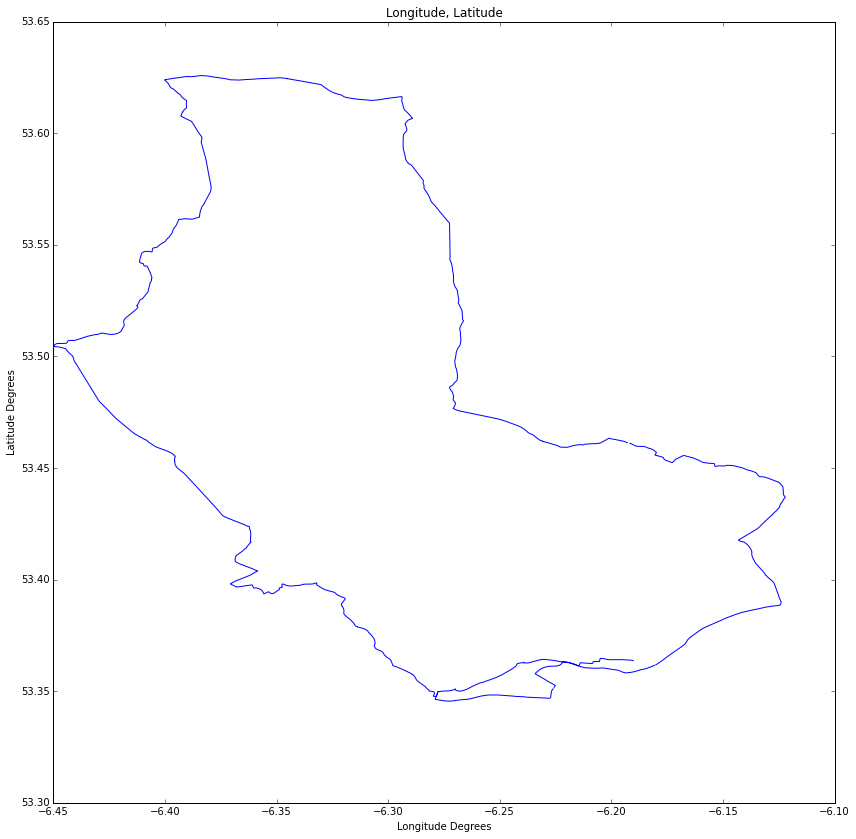

In [25]:
# new style method 2; use an axes array
fig, axs = plt.subplots(4, 1, sharex=True,  figsize=(14, 20))

axs[0].fill_between(range(len(df)),df.altitude,  
                    facecolor='green', 
                    alpha=0.7,
                   color = 'green')
axs[0].set_ylabel('Metres')
axs[0].set_title('Altitude')
axs[0].set_ylim( [min(df.altitude) - 10, max(df.altitude) + 10])

axs[1].fill_between(range(len(df)),df.heart_rate,  
                    facecolor='red', 
                    alpha=0.7,
                   color = 'red')
axs[1].set_ylabel('Beats per Minute')
axs[1].set_title('Heart Rate')
axs[1].set_ylim( [min(df.heart_rate) - 10, max(df.heart_rate) + 10])

axs[2].fill_between(range(len(df)),df.cadence,  
                    facecolor='black', alpha = .8)
axs[2].set_ylabel('Revs per Minute')
axs[2].set_title('Cadence')
axs[2].set_ylim( [0, max(df.cadence) + 10])

axs[3].fill_between(range(len(df)),df.distance.fillna(method = 'bfill'),  facecolor='orange',alpha = .6)
axs[3].set_ylabel('Metres')
axs[3].set_title('Distance')
axs[3].set_xlim( [0, len(df)])
axs[3].set_xlabel('Data Point Number')



fig2, axs2 = plt.subplots(1,1,  figsize=(14, 14))
axs2.set_title('Longitude, Latitude')
axs2.set_xlabel('Longitude Degrees')
axs2.set_ylabel('Latitude Degrees')
_ = axs2.plot(df.longitude, df.latitude)

### Detect  Data Frame  for missing values

In [26]:
df_missing = pd.DataFrame(index = df.index)
df_missing['cadence'] = df.cadence.apply(lambda x: pd.isnull(x) )
df_missing['heart_rate'] = df.heart_rate.apply(lambda x: pd.isnull(x) )
df_missing['altitude'] = df.altitude.apply(lambda x: pd.isnull(x) )
df_missing['distance'] = df.distance.apply(lambda x: pd.isnull(x) )
df_missing['longitude'] = df.longitude.apply(lambda x: pd.isnull(x) )
df_missing['latitude'] = df.latitude.apply(lambda x: pd.isnull(x) )

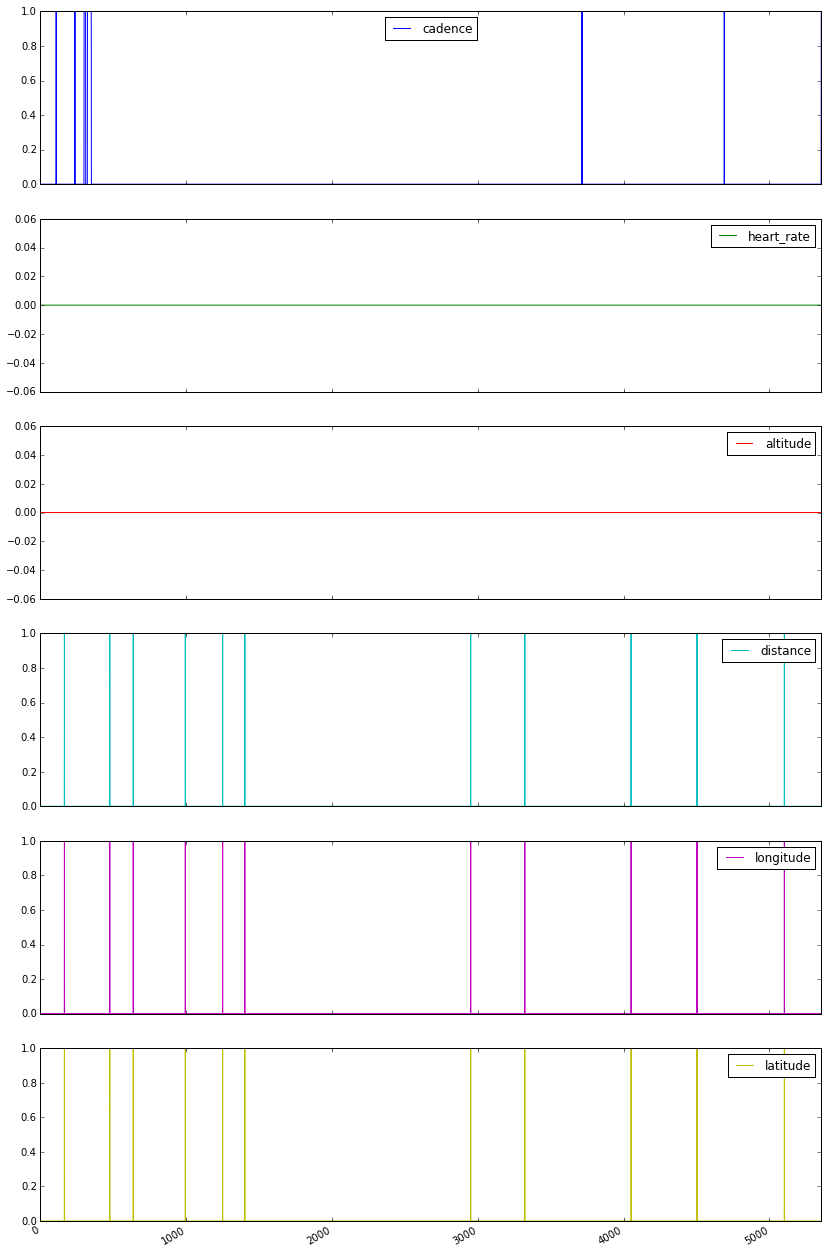

In [27]:
#plt.figure()
#plt.xlabel('Data Point Number')
_ = df_missing.plot(figsize=(14, 24), subplots=True,
            )

In [28]:
df_missing.sum()

cadence       46
heart_rate     0
altitude       0
distance      11
longitude     11
latitude      11
dtype: int64

## Delete values where distance is missing

In [29]:
df.dropna(subset=['distance'], inplace=True)

In [30]:
df.describe()

,altitude,cadence,distance,heart_rate,latitude,longitude
count,5347.000000,5301.000000,5347.000000,5347.000000,5347.000000,5347.000000
mean,111.992968,65.547444,55305.131840,128.571348,53.491536,-6.301922
std,36.719490,34.927211,28127.615377,13.725037,0.093893,0.083439
min,54.799999,0.000000,5.010000,85.000000,53.345526,-6.449606
25%,78.199997,57.000000,35449.244141,118.000000,53.397380,-6.381119
50%,119.599998,78.000000,56192.808594,129.000000,53.495561,-6.293268
75%,137.800003,89.000000,74205.464844,139.000000,53.577163,-6.258500
max,200.600006,128.000000,105730.960938,162.000000,53.625859,-6.122161


## Fix Missing Values

In [31]:
df.fillna(method='ffill', inplace = True) # last know value method

In [32]:
df[ (df.cadence.isnull() == True) | (df.distance.isnull() == True)].head()

,altitude,cadence,distance,heart_rate,latitude,longitude,time


## Export data to csv file

In [33]:
df.head()

,altitude,cadence,distance,heart_rate,latitude,longitude,time
0,79.400002,76,5.010000,103,53.363708,-6.190183,2015-09-13T06:25:51
1,90.800003,83,28.090000,106,53.363761,-6.190519,2015-09-13T06:25:56
2,90.800003,84,34.740002,106,53.363779,-6.190614,2015-09-13T06:25:57
3,90.800003,85,40.650002,108,53.363817,-6.190668,2015-09-13T06:26:00
4,90.800003,87,52.090000,110,53.363877,-6.190771,2015-09-13T06:26:03


In [34]:
df.to_csv(output_file_path)